In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import xarray as xr

In [2]:
data = xr.open_dataset("combined.nc")

In [3]:
# Storing the lat and lon data of the netCDF file into variables
lats = data.variables['lat'][93:113]
lons = data.variables['lon'][64:80]
time = data.variables['time'][:]
tave =data.variables['tave'][:]

In [4]:
lat_tamilnadu = 11.1271
lon_tamilnadu = 78.6569

In [5]:
# Squared difference between the specified lat, lon and the lat,lon of the netCDF
sq_diff_lat = (lats - lat_tamilnadu)**2
sq_diff_lon = (lons - lon_tamilnadu)**2

In [6]:
# Identify the index of the min value for lat and lon
min_index_lat = sq_diff_lat.argmin()
min_index_lon = sq_diff_lon.argmin()

In [7]:
mp = Basemap(projection = 'merc',
             llcrnrlon = 68,
             llcrnrlat = 5,
             urcrnrlon = 100,
             urcrnrlat = 36,
             resolution = 'i')

In [8]:
lon, lat = np.meshgrid(lons, lats)
x,y = mp(lon,lat)

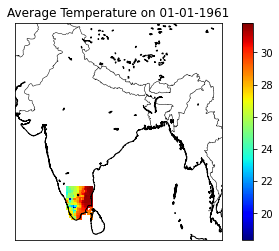

In [9]:
c_scheme = mp.pcolor(x, y, np.squeeze(tave[2000,93:113,64:80]), cmap = 'jet')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp.colorbar(c_scheme, location = 'right', pad = '10%')

plt.title('Average Temperature on 01-01-1961')
plt.show()